# Linear Regression With PyTorch

### About Linear Regression

#### 1. Simple Linear Regression

* Allows us to understand relationship between two continious variables 
* Example
    * x: independent variable
    * y: dependent variable

* $y = \alpha$x +b

#### Simple Example of Linear Regression

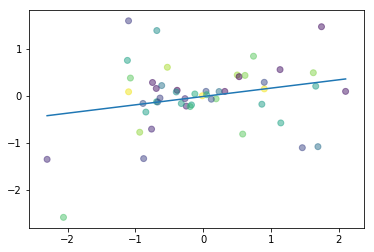

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y , c=colors , alpha =0.5)
plt.show()

#### Aim of Linear Regression

* Minimizing the distance between the points and the line (y=ax+b)
* Adjusting
    * Coeffcient : a
    * Bias/Intercept : b
    
#### Building a Linear Regression Model With PyTorch

* Coeffcient :a = 2
* Bias/Intercept :b = 1
* Equation :y = 2x+1


### Building a Toy Dataset 



In [14]:
x_values = [i for i in range(11)]

In [15]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [16]:
#convert to numpy array
x_train = np.array(x_values , dtype=np.float32)
x_train.shape

(11,)

In [17]:
# Important : we need to reshape it to 2D

x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

Then 

y =2x+1

In [19]:
y_values = [2*i + 1 for i in x_values]

In [20]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [21]:
# with normal python code
y_values = []
for i in x_values:
    result = 2*i+1
    y_values.append(result)

In [22]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [23]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [25]:
# resizing to 2d array
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [31]:
from IPython.display import display, Math, Latex

### Building Model

#### Critical Imports


In [26]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable

#### Model 
* 1. Linear Model: y = 2x+1 

* 2. Forward 
    * Example
        - Input x = 1
        - Output y = ?

In [29]:
# create class

class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim , output_dim)
        
    def forward(self,x):
        out =  self.linear(x)
        return out

#### Instantiate Model Class

* Input : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

* desired Output : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21] 

In [30]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim,output_dim)



#### Instantiate Loss Class

* MSE Loss : Mean Squared Error
* MSE  = $\frac{1}{n}\sum^{n}_{i=1}({y_{i}}'-y_{i})$

In [32]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class

* Simplified Equation :$\Theta = \Theta -\eta .*\bigtriangledown _{\Theta }$
    * $\Theta$ : parameter(Our Variables)
    * $\eta$ : learning rate
    * $\bigtriangledown _{\Theta }$ : parameter's gradients
    
* Even Simpler equation:
    * parameters  = parameters-learning_rate * parameter_gradients
    * parameters : a & b in y =  ax+b
    * desired parameter:a=2 & b =1 in y=2x+1

In [34]:
learning_rate = 0.01


#Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

#### Train Model

* 1 epoch : going through the whole x_train data once 
    * 100 epochs : 
        * 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* Process
    1. Convert input/labels to variables
    2. Clear gradient buffets
    3. Get Output given inputs
    4. Get loss
    5. Get gradient w.r.t to parameters
    6. update parameters using gradients
        * parameters = parameters-learning_rate * parameter_gradients
    7. Repeat

In [36]:
epochs = 100

In [39]:
for epoch in range(epochs):
    epoch += 1
    
    #converting numpy array to Torch Tensor
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #clearing gradient w.r.t variables
    optimizer.zero_grad()
    
    #forward to get outputs
    outputs = model(inputs)
    
    #loss
    loss = criterion(outputs, labels)
    
    # getting gradients w.r.t to parameters
    loss.backward()
    
    #updating parameters
    optimizer.step()
    
    print('epoch {}, losss {}'.format(epoch,loss.data[0]))
    
    
    

                  

epoch 1, losss 116.67632293701172
epoch 2, losss 9.700424194335938
epoch 3, losss 0.9726901650428772
epoch 4, losss 0.25877150893211365
epoch 5, losss 0.19853535294532776
epoch 6, losss 0.1916409432888031
epoch 7, losss 0.1891191005706787
epoch 8, losss 0.1869761198759079
epoch 9, losss 0.18488581478595734
epoch 10, losss 0.1828208714723587
epoch 11, losss 0.1807795763015747
epoch 12, losss 0.17876070737838745
epoch 13, losss 0.1767646074295044
epoch 14, losss 0.17479075491428375
epoch 15, losss 0.17283861339092255
epoch 16, losss 0.17090849578380585
epoch 17, losss 0.16900032758712769
epoch 18, losss 0.16711290180683136
epoch 19, losss 0.1652468889951706
epoch 20, losss 0.1634015440940857
epoch 21, losss 0.16157695651054382
epoch 22, losss 0.15977275371551514
epoch 23, losss 0.15798865258693695
epoch 24, losss 0.15622417628765106
epoch 25, losss 0.1544797718524933
epoch 26, losss 0.15275467932224274
epoch 27, losss 0.1510487198829651
epoch 28, losss 0.14936217665672302
epoch 29, losss

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


#### Compare Data

In [40]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.52014595],
       [ 2.5892491 ],
       [ 4.6583524 ],
       [ 6.7274556 ],
       [ 8.796559  ],
       [10.865663  ],
       [12.934766  ],
       [15.003869  ],
       [17.072971  ],
       [19.142075  ],
       [21.211178  ]], dtype=float32)

In [41]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### Graph Plot 



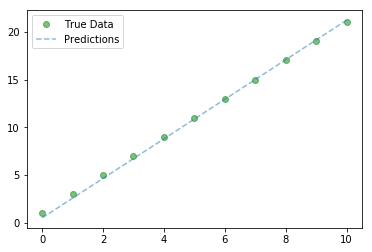

In [46]:
#clear figure
plt.clf()

#get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

#plot the true data
plt.plot(x_train,y_train,'go',label='True Data',alpha=0.5)

#plot predictions
plt.plot(x_train,predicted,'--',label='Predictions',alpha=0.5)

#Legend & Plot
plt.legend(loc='best')
plt.show()

